In [1]:
import pandas as pd
import numpy as np
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import cv2

In [2]:
def load_image( infilename ) :
    img = Image.open( infilename ).convert('RGB')
    plt.imshow(img)
    return img

(1024, 768)


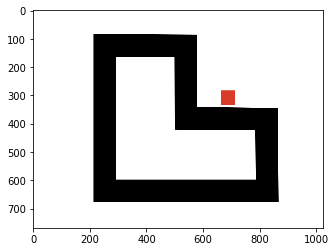

In [3]:
img = load_image('circuits/first_try03.png')
print(img.size)

In [4]:
def invert_img(img):
    img = ImageOps.invert(img)
    plt.imshow(img)
    return img

In [5]:
# img_invert = invert_img(img)

In [6]:
def rotate_img(img, angle):
    # Anti-clockwise rotation
    img_rot = img.rotate(angle, expand=True)
    plt.imshow(img_rot)
    return img_rot

In [7]:
# img_rot = rotate_img(img, 90)

In [8]:
def mirror_img(img, horizontal=False):
    if not horizontal:
        # if not horizontal : mirror from left to right
        img_mir = ImageOps.mirror(img)
    else:
        # if horizontal : mirror from top to bottom
        img = img.rotate(90, expand=True)
        img_mir = ImageOps.mirror(img)
        img_mir = img_mir.rotate(-90, expand=True)
        
    plt.imshow(img_mir)
    return img_mir

In [9]:
# img_mir = mirror_img(img_invert, True)

In [10]:
color_img = np.asarray(img)